In [175]:
from sktime.datasets import load_UCR_UEA_dataset
import pandas as pd
import matplotlib.pyplot as plt
from sktime.classification.dictionary_based import IndividualBOSS, IndividualTDE
from sktime.classification.interval_based import SupervisedTimeSeriesForest
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.interval_based._rise import RandomIntervalSpectralEnsemble
from sktime.classification.feature_based import SummaryClassifier, Catch22Classifier
from sklearn.ensemble import RandomForestClassifier

## Описание датасета
Датасет взят [отсюда](https://www.timeseriesclassification.com/description.php?Dataset=Computers)

Признак - потребление электроэнергии.  
Данные содержат показания 251 домохозяйства, взятые с двухминутными интервалами в течение месяца. Длина каждой серии - 720 (24 часа показаний, снятых каждые 2 минуты).  
Классы: настольный компьютер (1 класс) и ноутбук (2 класс).  



In [ ]:
X_train, y_train = load_UCR_UEA_dataset(name="Computers", return_X_y=True, split="TRAIN")

In [ ]:
X_test, y_test = load_UCR_UEA_dataset(name="Computers", split="TEST")

In [150]:
y_df = pd.DataFrame(data=y_train, columns=['label'])

indexes_1_class = y_df[y_df['label'] == '1'].index[:50]
indexes_2_class = y_df[y_df['label'] == '2'].index[:50]

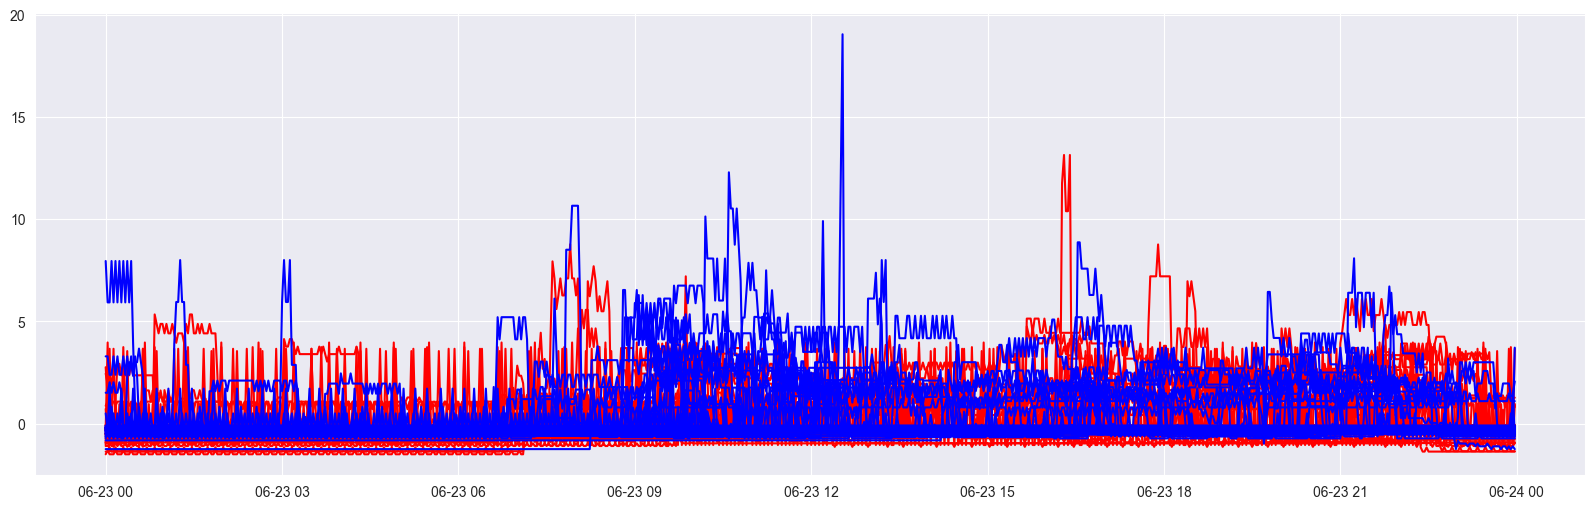

In [151]:
# Графики нескольких серий раскрашенных по классам
date_time_index = pd.date_range(start='00:00', end='23:58', freq='2min')

plt.figure(figsize=(20,6))
for series in X_train['dim_0'][indexes_1_class]:
    plt.plot(pd.Series(series).set_axis(date_time_index), color='red')
    
for series in X_train['dim_0'][indexes_2_class]:
    plt.plot(pd.Series(series).set_axis(date_time_index), color='blue')


In [158]:
def print_score(clf_s):
    print(f'score {clf_s.score(X_test, y_test):.3f}')

In [168]:
# Используем несколько алгоритмов для классификации
clf = IndividualBOSS(n_jobs=20)
clf.fit(X_train, y_train)
print_score(clf)

score 0.664


C:\Program Files\Python311\Lib\site-packages\sklearn\utils\parallel.py:116: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(


In [169]:
clf = IndividualTDE(n_jobs=20)
clf.fit(X_train, y_train)
print_score(clf)

score 0.648


In [189]:
clf = TimeSeriesForestClassifier(n_estimators=100, n_jobs=20)
clf.fit(X_train, y_train)
print_score(clf)

score 0.716


In [173]:
clf = RandomIntervalSpectralEnsemble(n_estimators=100, n_jobs=20)
clf.fit(X_train, y_train)
print_score(clf)

score 0.680


In [172]:
clf = SupervisedTimeSeriesForest(n_estimators=100, n_jobs=20)
clf.fit(X_train, y_train)
print_score(clf)

score 0.736


In [177]:
summary_funcs = ("mean", "min", "max", "median", "sum", "skew", "kurt",
    "var", "std", "mad", "sem", "nunique", "count")

clf = SummaryClassifier(summary_functions=summary_funcs,
                        estimator=RandomForestClassifier(n_estimators=100))
clf.fit(X_train, y_train)
print_score(clf)

score 0.744


In [178]:
clf = Catch22Classifier(estimator=RandomForestClassifier(n_estimators=100))
clf.fit(X_train, y_train)
print_score(clf)

score 0.716


Без подбора параметром и какой то обработки данных лучше всего себя показал алгоритм - SummaryClassifier